In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#import csv
df = pd.read_csv('Cleaned_Data.csv')
df.head()

,PRIMARY_KEY,STATE,Region,YEAR,ENROLL,TOTAL_REVENUE,TOTAL_REVENUE_PS,FEDERAL_REVENUE,FEDERAL_REVENUE_PS,STATE_REVENUE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1993_ALABAMA,ALABAMA,South,1993,727716,2827391,4.172101,331409,0.489027,1729295,...,57497,60004,39900,470775,198651,677690,208.327876,252.187522,207.963517,260.276441
1,1994_ALABAMA,ALABAMA,South,1994,730004,2970223,4.375645,331823,0.488832,1850894,...,56773,59165,41730,468472,201285,678808,208.327876,252.187522,207.963517,260.276441
2,1995_ALABAMA,ALABAMA,South,1995,727480,3367437,4.905868,328957,0.479243,2161366,...,56486,59914,40981,470246,206840,686410,208.327876,252.187522,207.963517,260.276441
3,1996_ALABAMA,ALABAMA,South,1996,735912,3365113,4.898393,334858,0.487433,2138717,...,57098,58305,42510,469370,207980,686983,211.646973,256.594863,210.920767,260.276441
4,1997_ALABAMA,ALABAMA,South,1997,737386,3981788,5.763349,376200,0.544522,2498847,...,57431,58210,44272,472847,208148,690881,211.646973,256.594863,210.920767,260.276441


In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

#Grade 4 Math vs Total Revenue

X = df.AVG_MATH_4_SCORE.values.reshape(-1, 1)
y = df.TOTAL_REVENUE.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (1143, 1) (1143, 1)


array([[208.3278759],
       [208.3278759],
       [208.3278759],
       ...,
       [246.5224009],
       [246.5224009],
       [246.7597645]])

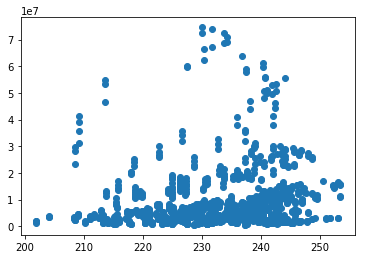

In [4]:
plt.scatter(X, y)

In [5]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [6]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[169916.55858159]]
y-axis intercept:  [-30190596.89640813]


In [8]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[201.8282612]]
Max X Value: [[253.4209611]]


In [9]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

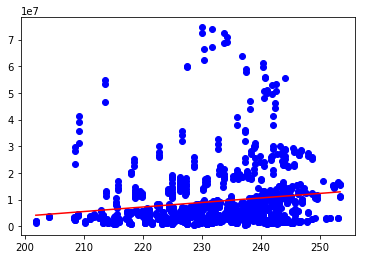

In [10]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [11]:
X = df.AVG_MATH_8_SCORE.values.reshape(-1, 1)
y = df.TOTAL_REVENUE.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (1143, 1) (1143, 1)


array([[252.1875224],
       [252.1875224],
       [252.1875224],
       ...,
       [288.1191373],
       [288.1191373],
       [286.6665471]])

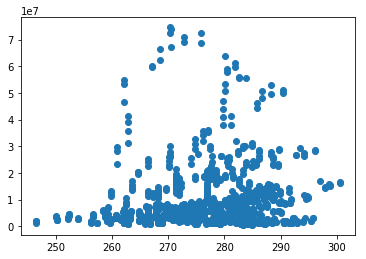

In [12]:
plt.scatter(X, y)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [14]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[82542.59726357]]
y-axis intercept:  [-13612659.44093154]


In [16]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[246.4580354]]
Max X Value: [[300.568235]]


In [17]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

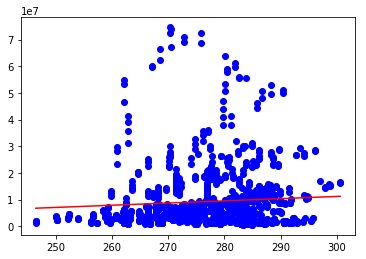

In [18]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [ ]:
#MSE and R2 of Average math scores and total revenue 

In [26]:
X = df["AVG_MATH_4_SCORE"].values.reshape(-1, 1)
y = df["TOTAL_REVENUE"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1143, 1) (1143, 1)


Text(0,0.5,'Total Revenue')

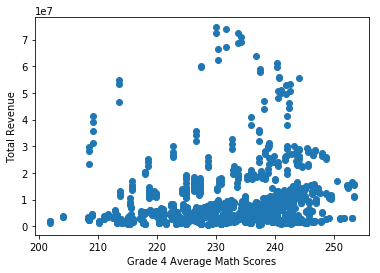

In [27]:
plt.scatter(X, y)
plt.xlabel("Grade 4 Average Math Scores")
plt.ylabel("Total Revenue")

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# Average 4th grade Math Scores vs Total Revenue 

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 157286155740806.78
R-squared (R2 ): 0.018880139951435337


In [32]:
model.score(X_test, y_test)

0.018880139951435337

In [ ]:
#Grade 8

In [33]:
X = df["AVG_MATH_8_SCORE"].values.reshape(-1, 1)
y = df["TOTAL_REVENUE"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1143, 1) (1143, 1)


Text(0,0.5,'Total Revenue')

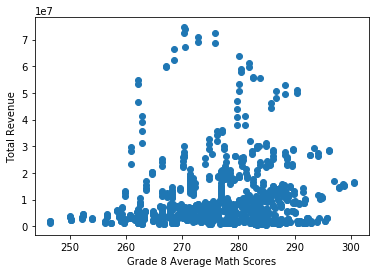

In [34]:
plt.scatter(X, y)
plt.xlabel("Grade 8 Average Math Scores")
plt.ylabel("Total Revenue")

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# Average 8th grade Math Scores vs Total Revenue 

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 160265134671852.38
R-squared (R2 ): 0.00029785991445951954
